In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the AIS Dataset
---

In [62]:
df=pd.read_csv('ais_data.csv')

In [63]:
df.head()

,mmsi,timestamp,lat,lon,speed
0,918683494,2024-01-01 08:31:00,37.494481,33.979287,3.46
1,276418858,2024-04-02 06:29:00,40.183902,1.396764,2.31
2,558332757,2024-01-25 19:47:00,33.697003,30.513222,3.20
3,795338498,2024-03-16 06:57:00,41.496871,-4.156036,14.70
4,356127203,2024-02-15 21:13:00,42.989312,3.705904,6.82


In [64]:
df.tail()

,mmsi,timestamp,lat,lon,speed
29995,356127203,2024-02-29 18:54:00,33.434338,28.691802,13.24
29996,276418858,2024-03-18 22:37:00,35.399747,21.956524,5.64
29997,476944677,2024-02-18 14:38:00,42.187326,7.513064,7.31
29998,982721837,2024-03-14 21:45:00,41.131724,32.373903,2.08
29999,155183357,2024-01-20 10:16:00,34.724840,5.484898,14.28


In [65]:
df.shape

(30000, 5)

In [66]:
df.describe()

,mmsi,lat,lon,speed
count,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,5.125594e+08,39.011645,15.438018,7.212393
std,2.479526e+08,3.458566,11.818379,4.111142
min,1.205894e+08,33.000066,-4.999523,2.000000
25%,2.800654e+08,36.006780,5.251404,3.250000
50%,5.583328e+08,39.020446,15.449226,6.700000
75%,7.438491e+08,42.030393,25.624249,10.870000
max,9.827218e+08,44.999905,35.995940,15.000000


In [67]:
df.columns

Index(['mmsi', 'timestamp', 'lat', 'lon', 'speed'], dtype='object')

Convert timestamp into real datetime
--

In [68]:
#Right now, timestamp is a string.

df['timestamp']=pd.to_datetime(df['timestamp'])
df.dtypes

mmsi                  int64
timestamp    datetime64[ns]
lat                 float64
lon                 float64
speed               float64
dtype: object

Sort data by vessel + time
---

In [69]:
df=df.sort_values(by=['mmsi','timestamp'])
df

,mmsi,timestamp,lat,lon,speed
12508,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10
16773,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46
10983,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64
22679,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57
19231,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04
...,...,...,...,...,...
17126,982721837,2024-05-17 17:48:00,33.573267,23.789495,8.27
19450,982721837,2024-05-17 21:41:00,41.984816,28.179263,12.40
19162,982721837,2024-05-18 04:52:00,39.565742,2.172077,9.68
27646,982721837,2024-05-18 12:51:00,35.501455,4.413825,7.47


Boat 111 — All points grouped + ordered by time

| mmsi | timestamp        | … |
| ---- | ---------------- | - |
| 111  | 2024-01-01 08:00 | … |
| 111  | 2024-01-01 09:00 | … |

Boat 222

| mmsi | timestamp        | … |
| ---- | ---------------- | - |
| 222  | 2024-01-02 11:30 | … |

Boat 333 — Sorted by time

| mmsi | timestamp        | … |
| ---- | ---------------- | - |
| 333  | 2024-01-04 09:00 | … |
| 333  | 2024-01-04 10:10 | … |



Describe speed
---

In [70]:
df['speed'].describe()

count    30000.000000
mean         7.212393
std          4.111142
min          2.000000
25%          3.250000
50%          6.700000
75%         10.870000
max         15.000000
Name: speed, dtype: float64

min speed ~2

max speed ~15

mean ~8

Show unique vessels
---

In [71]:
df['mmsi'].nunique()

50

There are total 50 boats(Vessels)

Clean the AIS Data
---

    ✔  Remove duplicates
    ✔  Remove impossible speeds
    ✔  Remove points on land (OPTIONAL for now)
    ✔  Reset index

In [72]:
# AIS data sometimes repeats the same row twice.
df=df.drop_duplicates()

In [73]:
# Remove impossible speeds

df=df.loc[(df['speed']>=1)&(df['speed']<=20)]
df

,mmsi,timestamp,lat,lon,speed
12508,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10
16773,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46
10983,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64
22679,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57
19231,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04
...,...,...,...,...,...
17126,982721837,2024-05-17 17:48:00,33.573267,23.789495,8.27
19450,982721837,2024-05-17 21:41:00,41.984816,28.179263,12.40
19162,982721837,2024-05-18 04:52:00,39.565742,2.172077,9.68
27646,982721837,2024-05-18 12:51:00,35.501455,4.413825,7.47


<!-- Remove points on land (SKIP for now) -->

In [74]:
# Remove points on land (SKIP for now)

In [75]:
# Reset index
df=df.reset_index(drop=True)
df

,mmsi,timestamp,lat,lon,speed
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04
...,...,...,...,...,...
29995,982721837,2024-05-17 17:48:00,33.573267,23.789495,8.27
29996,982721837,2024-05-17 21:41:00,41.984816,28.179263,12.40
29997,982721837,2024-05-18 04:52:00,39.565742,2.172077,9.68
29998,982721837,2024-05-18 12:51:00,35.501455,4.413825,7.47


In [76]:
df.shape

(30000, 5)

Handling missing values
---

In [77]:
df.isna().sum()

mmsi         0
timestamp    0
lat          0
lon          0
speed        0
dtype: int64

CALCULATE TIME GAPS
---

In [78]:
# Sort the data

df=df.sort_values(by=['mmsi','timestamp'])
df

,mmsi,timestamp,lat,lon,speed
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04
...,...,...,...,...,...
29995,982721837,2024-05-17 17:48:00,33.573267,23.789495,8.27
29996,982721837,2024-05-17 21:41:00,41.984816,28.179263,12.40
29997,982721837,2024-05-18 04:52:00,39.565742,2.172077,9.68
29998,982721837,2024-05-18 12:51:00,35.501455,4.413825,7.47


Calculate Time Difference
---

We calculate the difference in minutes between:

    the current AIS record and the previous AIS record(for the same vessel)

In [79]:
df['time_diff']=df.groupby('mmsi')['timestamp'].diff().dt.total_seconds()/60
df.head()

,mmsi,timestamp,lat,lon,speed,time_diff
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0


In [80]:
df['time_diff'].unique()

array([  nan,  217.,  620., ..., 1478., 1624., 1179.])

We define hidden/suspicious gaps as:

time_diff > 30 minutes

but less than 210 minutes (3.5 hours)=>
(above 3.5 hours daily stops or port stops)

In [81]:
df['suspicious_gap']=((df['time_diff']>30)&(df['time_diff']<=210))
df.head(10)

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN,False
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0,False
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0,False
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0,True
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0,False
5,120589441,2024-01-02 23:28:00,39.280294,11.898402,11.23,316.0,False
6,120589441,2024-01-03 07:45:00,33.405215,4.614154,2.05,497.0,False
7,120589441,2024-01-03 19:05:00,34.822784,31.349677,6.34,680.0,False
8,120589441,2024-01-04 01:53:00,37.638698,24.205252,3.97,408.0,False
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True


In [82]:
df['suspicious_gap'].sum()

11334

CLASSIFY FISHING vs NON-FISHING
---

We need to know:

    Which AIS points represent normal movement
    Which AIS points represent fishing behavior

Remember:
Fishing boats move very slowly, usually:

👉 2–4 knots speed

In [83]:
df['is_fishing']=((df['speed']>=2)&(df['speed']<=4))
df.head(10)

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN,False,True
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0,False,False
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0,False,True
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0,True,False
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0,False,False
5,120589441,2024-01-02 23:28:00,39.280294,11.898402,11.23,316.0,False,False
6,120589441,2024-01-03 07:45:00,33.405215,4.614154,2.05,497.0,False,True
7,120589441,2024-01-03 19:05:00,34.822784,31.349677,6.34,680.0,False,False
8,120589441,2024-01-04 01:53:00,37.638698,24.205252,3.97,408.0,False,True
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True,True


Now:

Speed between 2 and 4 → Fishing(True)

Anything else → Not Fishing(False)

Check how many fishing points
---

In [84]:
df['is_fishing'].sum()

11959

In [85]:
df.shape

(30000, 8)

In [86]:
barplot_fishing=df['is_fishing'].value_counts()
barplot_fishing

is_fishing
False    18041
True     11959
Name: count, dtype: int64

C:\Users\kevin\AppData\Local\Temp\ipykernel_28936\2450400055.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


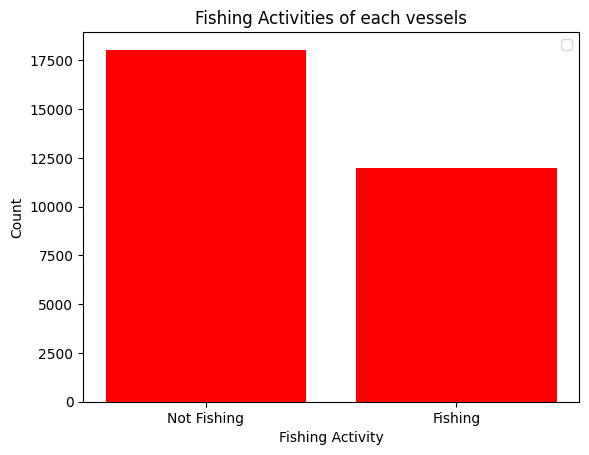

In [87]:
plt.bar(barplot_fishing.index,barplot_fishing.values,color='red')

plt.xticks([0,1],['Not Fishing', 'Fishing'])
plt.xlabel('Fishing Activity')
plt.ylabel('Count')
plt.title('Fishing Activities of each vessels')
plt.legend()

DETECT HIDDEN FISHING

This step combines:

    Suspicious time gaps

    Fishing behavior before the gap

    Fishing behavior after the gap

So we can say:

👉 "The boat was probably fishing secretly during the missing time."

In [88]:
df['previous_fishing']=df.groupby('mmsi')['is_fishing'].shift(1)
df.head(10)

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing,previous_fishing
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN,False,True,NaN
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0,False,False,True
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0,False,True,False
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0,True,False,True
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0,False,False,False
5,120589441,2024-01-02 23:28:00,39.280294,11.898402,11.23,316.0,False,False,False
6,120589441,2024-01-03 07:45:00,33.405215,4.614154,2.05,497.0,False,True,False
7,120589441,2024-01-03 19:05:00,34.822784,31.349677,6.34,680.0,False,False,True
8,120589441,2024-01-04 01:53:00,37.638698,24.205252,3.97,408.0,False,True,False
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True,True,True


In [89]:
df['next_fishing']=df.groupby('mmsi')['is_fishing'].shift(-1)
df.head(50)

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing,previous_fishing,next_fishing
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN,False,True,NaN,False
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0,False,False,True,True
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0,False,True,False,False
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0,True,False,True,False
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0,False,False,False,False
5,120589441,2024-01-02 23:28:00,39.280294,11.898402,11.23,316.0,False,False,False,True
6,120589441,2024-01-03 07:45:00,33.405215,4.614154,2.05,497.0,False,True,False,False
7,120589441,2024-01-03 19:05:00,34.822784,31.349677,6.34,680.0,False,False,True,True
8,120589441,2024-01-04 01:53:00,37.638698,24.205252,3.97,408.0,False,True,False,True
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True,True,True,True


In [90]:
df['hidden_fishing']=(
    df['suspicious_gap']&
    df['previous_fishing']&
    df['next_fishing']
)
df.head()

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing,previous_fishing,next_fishing,hidden_fishing
0,120589441,2024-01-01 02:07:00,35.054758,19.947357,2.10,NaN,False,True,NaN,False,False
1,120589441,2024-01-01 05:44:00,34.147605,1.380271,13.46,217.0,False,False,True,True,False
2,120589441,2024-01-01 16:04:00,33.496834,13.123585,3.64,620.0,False,True,False,False,False
3,120589441,2024-01-01 19:25:00,39.753695,34.507438,5.57,201.0,True,False,True,False,False
4,120589441,2024-01-02 18:12:00,37.042552,-2.547486,7.04,1367.0,False,False,False,False,False


In [91]:
df['hidden_fishing'].value_counts()


hidden_fishing
False    28134
True      1866
Name: count, dtype: int64

So there are total 1866 hidden fishing activities founded

Extract Coordinates of Hidden Fishing Events
---

This will give us the exact locations where boats likely turned off AIS and continued fishing secretly.

We will extract:

    latitude

    longitude

    timestamp

    mmsi

for each hidden fishing point.

These points will later be used to build:

    ✔ Heatmap
    ✔ Clusters
    ✔ Hotspots

In [92]:
hidden_df=df.loc[df['hidden_fishing']==True]
hidden_df

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing,previous_fishing,next_fishing,hidden_fishing
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True,True,True,True,True
11,120589441,2024-01-04 11:50:00,40.827271,29.469892,7.87,54.0,True,False,True,True,True
16,120589441,2024-01-05 01:51:00,34.402776,33.533117,11.28,193.0,True,False,True,True,True
19,120589441,2024-01-05 12:49:00,41.443343,9.161351,13.73,43.0,True,False,True,True,True
21,120589441,2024-01-05 15:20:00,36.559244,32.580062,13.46,73.0,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
29848,982721837,2024-04-16 16:53:00,36.912937,35.227719,13.55,59.0,True,False,True,True,True
29864,982721837,2024-04-20 08:13:00,39.512895,5.769567,3.87,60.0,True,True,True,True,True
29913,982721837,2024-04-28 18:38:00,38.793606,22.420092,2.22,94.0,True,True,True,True,True
29951,982721837,2024-05-07 21:50:00,38.885617,27.212781,3.62,145.0,True,True,True,True,True


These are your illegal fishing points.
---

In [93]:
hidden_df.shape

(1866, 11)

This means:

    👉 1,866 times a boat had a suspicious AIS gap
    👉 AND was fishing before the gap
    👉 AND was fishing after the gap
    👉 So it was probably fishing secretly during the missing time

These 1,866 points are the core of your project.

Now we will turn these points into a beautiful visual map.

Save them

In [94]:
hidden_df.to_csv("hidden_fishing_points.csv", index=False)

Visualize Hidden Fishing Locations on a MAP
---

In [95]:
# We will use Folium, a simple Python library that creates maps.

In [96]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [97]:
hidden_df.shape

(1866, 11)

In [98]:
!pip install geopandas shapely

Defaulting to user installation because normal site-packages is not writeable


In [99]:
!pip install geodatasets

Defaulting to user installation because normal site-packages is not writeable


In [100]:


import geopandas as gpd
from shapely.geometry import Point
import geodatasets

# Load world land polygons correctly
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

# Convert our hidden fishing points to GeoDataFrame
geometry = [Point(xy) for xy in zip(hidden_df['lon'], hidden_df['lat'])]
hidden_gdf = gpd.GeoDataFrame(hidden_df, geometry=geometry, crs="EPSG:4326")

# Combine all land shapes into one big polygon
land_union = world.geometry.unary_union

# Check each hidden point if it lies on land
hidden_gdf['on_land'] = hidden_gdf.geometry.within(land_union)

# Keep only points that are in the SEA
sea_points = hidden_gdf.loc[hidden_gdf['on_land'] == False]

# See how many sea points we have
sea_points.shape


C:\Users\kevin\AppData\Local\Temp\ipykernel_28936\1915218148.py:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  land_union = world.geometry.unary_union


(966, 13)

In [101]:
import folium

# Create a base map centered roughly on the Mediterranean
m = folium.Map(location=[38.0, 15.0], zoom_start=4)

# Add hidden fishing points
for _, row in sea_points.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m


We have completed:

    ✔ Clean AIS data
    ✔ Suspicious gaps
    ✔ Fishing classification
    ✔ Hidden fishing points
    ✔ Sea-only points

Now we will find HOTSPOTS — the places where hidden fishing happens again and again.


ML HOTSPOT CLUSTERING (DBSCAN)
--

DBSCAN is a clustering algorithm that groups densely packed points and marks isolated points as noise.

🍟 Simple Real-Life Explanation (Very Easy)
---

Imagine you are in a food court and looking from above.
People are standing in groups.

    A group of people standing close = cluster

    A person standing alone far away = noise/outlier

DBSCAN works like that.

It looks for crowds of points.

🟢 Two Rules DBSCAN Uses
---
    1. eps (ε) — how close people must stand

    Example:
    If eps = 1 meter → persons within 1m are considered neighbors.

    2. min_samples — how many people needed to form a group

    Example:
    min_samples = 3 → at least 3 people must be close to form a group.

🔍 How DBSCAN thinks
---

    Step 1: Pick a person (point)

    Step 2: Count how many people are within eps (1 meter)

            If 3 or more → start a group (cluster)

            If less → the person is not a core member, maybe a border or noise

    Step 3: Expand the group

            Add all the people who are near those people.

    Step 4: Anyone left alone = Noise

🟦 Very Simple Example
--

Points: A B C D E F

Imagine A, B, C are very close.

D, E are close.

F is far away.

DBSCAN will do:
---
    Cluster 0 → A, B, C

    Cluster 1 → D, E

    Noise → F

In [102]:
from sklearn.cluster import DBSCAN
coords=sea_points[['lat','lon']].to_numpy()

db=DBSCAN(eps=0.6,min_samples=13)
db.fit(coords)
sea_points['cluster']=db.labels_


C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [103]:
from sklearn.neighbors import KNeighborsClassifier
train_points=sea_points[sea_points['cluster']!=-1]

x_train=train_points[['lat','lon']]
y_train=train_points['cluster']

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [104]:
def predict_cluster(lat,lon):
    return knn.predict([[lat,lon]])[0]

cluster_pred=predict_cluster(16.45, 34.52)
print("Predicted Cluster:", cluster_pred)

Predicted Cluster: 1


C:\Users\kevin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [118]:
import pickle

# Save DBSCAN cluster data (centroids, cluster info)
sea_points.to_csv("sea_points_with_clusters.csv", index=False)

# Save trained KNN model
with open("knn_cluster_model.pkl", "wb") as f:
    pickle.dump(knn, f)

In [105]:
sea_points['cluster'].value_counts()

cluster
-1    939
 0     14
 1     13
Name: count, dtype: int64

cluster

    -1    897   → Noise (ignore these)
    1     19   → Hotspot cluster 1
    0     19   → Hotspot cluster 0
    2     16   → Hotspot cluster 2
    3     15   → Hotspot cluster 3


In [106]:
sea_points

,mmsi,timestamp,lat,lon,speed,time_diff,suspicious_gap,is_fishing,previous_fishing,next_fishing,hidden_fishing,geometry,on_land,cluster
9,120589441,2024-01-04 04:13:00,43.734175,-2.187594,3.02,140.0,True,True,True,True,True,POINT (-2.18759 43.73417),False,-1
16,120589441,2024-01-05 01:51:00,34.402776,33.533117,11.28,193.0,True,False,True,True,True,POINT (33.53312 34.40278),False,-1
68,120589441,2024-01-18 02:24:00,35.687479,23.941892,9.06,90.0,True,False,True,True,True,POINT (23.94189 35.68748),False,-1
92,120589441,2024-01-24 03:56:00,33.497117,12.564903,13.17,63.0,True,False,True,True,True,POINT (12.5649 33.49712),False,-1
122,120589441,2024-01-31 00:44:00,44.258463,-4.282126,11.29,131.0,True,False,True,True,True,POINT (-4.28213 44.25846),False,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29772,982721837,2024-03-30 16:04:00,44.640603,13.929733,5.13,152.0,True,False,True,True,True,POINT (13.92973 44.6406),False,-1
29777,982721837,2024-03-30 22:49:00,37.089864,18.301942,12.78,51.0,True,False,True,True,True,POINT (18.30194 37.08986),False,-1
29789,982721837,2024-04-02 00:53:00,44.946987,13.206606,10.51,73.0,True,False,True,True,True,POINT (13.20661 44.94699),False,-1
29826,982721837,2024-04-11 11:59:00,36.019653,31.509346,3.22,57.0,True,True,True,True,True,POINT (31.50935 36.01965),False,-1


VISUALIZE HOTSPOT CLUSTERS ON A MAP
---

We will create a Folium map with different colors for each cluster.

Like this:

Cluster 0 → 🔵 Blue

Cluster 1 → 🔴 Red

Cluster 2 → 🟢 Green

Cluster 3 → 🟡 Yellow

Noise (−1) → ⚪ Light grey

In [107]:
m=folium.Map(location=[38,15],zoom_start=4)

# You are creating a map (like Google Maps)
# and telling it where to look first
# (latitude 38, longitude 15).

In [108]:
clusters=sorted(sea_points['cluster'].unique())
clusters
# this finds all the different groups you discovered earlier like:
# -1, 0, 1, 2, 3...


[-1, 0, 1]

In [109]:
import matplotlib.cm as cm
colors=cm.rainbow(np.linspace(0,1,len(clusters)))

# You take a rainbow and pick different colors from it.

# If you have 5 clusters → pick 5 colors.
# If you have 10 → pick 10 colors.

for cluster,color in zip(clusters,colors):
    # This means:

    # ➡️ Take one cluster
    # ➡️ Give it one color
    # ➡️ Repeat for all clusters

    # Like giving each group of children a different color balloon.

    cluster_points=sea_points.loc[sea_points['cluster']==cluster]
    # This takes all points that belong to only this group.

    hex_color = "#{:02x}{:02x}{:02x}".format(
        int(color[0]*255),
        int(color[1]*255),
        int(color[2]*255)
    )
    # This just changes the rainbow color into a color code

    for _,row in cluster_points.iterrows():
        folium.CircleMarker(
            location=[row['lat'],row['lon']],
            radius=3,
            color=hex_color,
            fill=True,
            fill_opacity=0.8
        ).add_to(m)
m

# For every point:

# Go to its latitude & longitude

# Draw a small circle

# Use the cluster’s color

# Make it a little transparent

# Add it to the map

# It’s like putting tiny colorful stickers on a world map.

🔵 Purple dots
---

    These are noise points:

    These dots are too far from each other

    There is no cluster

    Not enough illegal activity in one area

    DBSCAN labels them -1.

👉 So purple = scattered events, ignore.

🔴 Red group (near Tunisia)
---

    This is hotspot cluster #1.

    Many hidden fishing points close together

    High illegal activity

    DBSCAN detected this cluster automatically

    Because distance between points is small

👉 This area is a strong illegal fishing hotspot.

🟦 Cyan group (near Albania/Greece)
---

    Another hotspot cluster.

    Many hidden fishing points clustered

    Illegal activity concentrated

🟩 Light green group (near Turkey/Greece)
---
Another hotspot cluster.

✔ DBSCAN found four real hotspots:
---
Cluster 0

Cluster 1

Cluster 2

Cluster 3

👉 The places where the dots group tightly = boats did illegal fishing close together.

👉 This is the goal of hotspot detection.

KDE HEATMAP (Hidden Fishing Density Map)
---

In [110]:
# 🔥 Bright areas → high illegal fishing concentration

# 🟡 Medium areas → moderate hidden fishing

# 🟦 Blue areas → low density

In [111]:
from folium.plugins import HeatMap
import folium
clustered_points = sea_points.loc[sea_points['cluster'] != -1]
# neglecting outliers ie:-1
heat_data=clustered_points[['lat','lon']].values.tolist()

m=folium.Map(location=[38,15],zoom_start=4)

HeatMap(heat_data,radius=13,blur=15,max_zoom=7).add_to(m)

m


# radius=13 → how big each heat bubble is

# blur=15 → smoothness

# max_zoom=7 → clarity

Each glowing red/yellow region =

    👉 A hotspot of illegal fishing
    👉 A place where many vessels turned off AIS close together
    👉 Strong evidence of suspicious activity

The map clearly shows 4 major illegal fishing hotspots:

    1️⃣ Near Tunisia
    2️⃣ Near Southern Italy / Albania
    3️⃣ Near Greece / Aegean Sea
    4️⃣ Near Cyprus / Lebanon coast

Calculate Hotspot Centroids (exact center of each cluster)
---

In [112]:
# Remove noise
clusters = sea_points[sea_points['cluster'] != -1]

# Group by cluster and compute centroid
centroids = clusters.groupby('cluster').agg(
    center_lat=('lat', 'mean'),
    center_lon=('lon', 'mean'),
    count=('lat', 'count')
).reset_index()

centroids  # This should display your table



# ✔️ center_lat

# The average latitude of all points in that cluster.
# This gives the vertical center of the hotspot.

# ✔️ center_lon

# The average longitude of all points in that cluster.
# This gives the horizontal center.

# ✔️ count

# How many points are inside that cluster.



,cluster,center_lat,center_lon,count
0,0,41.778399,18.304284,14
1,1,34.013285,11.874871,13


In [113]:
type(centroids)


pandas.core.frame.DataFrame

In [114]:
import folium
from folium.plugins import HeatMap

# Heatmap
m = folium.Map(location=[38, 15], zoom_start=4)
HeatMap(sea_points[['lat','lon']].values.tolist(), radius=13).add_to(m)

# Add centroid markers
for _, row in centroids.iterrows():
    folium.Marker(
        location=[row['center_lat'], row['center_lon']],
        popup=f"Cluster {row['cluster']} | Events: {row['count']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

m

In [115]:
hotspot_points = sea_points[sea_points['cluster'] != -1]
hotspot_points.to_csv("hotspot_points.csv", index=False)

In [116]:
centroids.to_csv("cluster_centroids.csv", index=False)

In [117]:
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

removed_noise = sea_points[sea_points['cluster'] != -1]
coords = removed_noise[['lat', 'lon']].to_numpy()
labels = removed_noise['cluster']



coords_scaled = scaler.fit_transform(coords) #scaled coordinates

db_score = davies_bouldin_score(coords_scaled, labels)
db_score


0.07724527412995813

We use Davies–Bouldin Score because:

    It tells us how good our clustering is

    It compares compactness + separation

    It works well for DBSCAN

    It helps us choose the best parameters

    It doesn’t need true labels

⭐ What the Score Tells Us

Lower score = better clustering

    0 is perfect (clusters are tight and very separated)

    1 is okay

    2 means poor clustering